In [1]:
import sys
import os
import random
import h5py
from collections import Counter
from progressbar import *
import re
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

# Add the path to the parent directory to augment search for module
par_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))

if par_dir not in sys.path:
    sys.path.append(par_dir)

from utils.plot_utils import *  
    
%load_ext autoreload

In [2]:
# Import test events from h5 file
filtered_index = "/fast_scratch/WatChMaL/data/IWCD_fulltank_300_pe_idxs.npz"
filtered_indices = np.load(filtered_index, allow_pickle=True)
test_filtered_indices = filtered_indices['test_idxs']

original_data_path = "/data/WatChMaL/data/IWCDmPMT_4pi_fulltank_9M.h5"
f = h5py.File(original_data_path, "r")

hdf5_event_data = (f["event_data"])
original_eventdata = np.memmap(original_data_path, mode="r", shape=hdf5_event_data.shape,
                                    offset=hdf5_event_data.id.get_offset(), dtype=hdf5_event_data.dtype)

original_eventids = np.array(f['event_ids'])
original_rootfiles = np.array(f['root_files'])
original_energies = np.array(f['energies'])
original_positions = np.array(f['positions'])
original_angles = np.array(f['angles'])
original_labels = np.array(f['labels'])
#filtered_eventdata = original_eventdata[test_filtered_indices]
filtered_eventids = original_eventids[test_filtered_indices]
filtered_rootfiles = original_rootfiles[test_filtered_indices]
filtered_energies = original_energies[test_filtered_indices]
filtered_positions = original_positions[test_filtered_indices]
filtered_angles = original_angles[test_filtered_indices]
filtered_labels = original_labels[test_filtered_indices]

In [3]:
index = 42

# Horizontal Flips

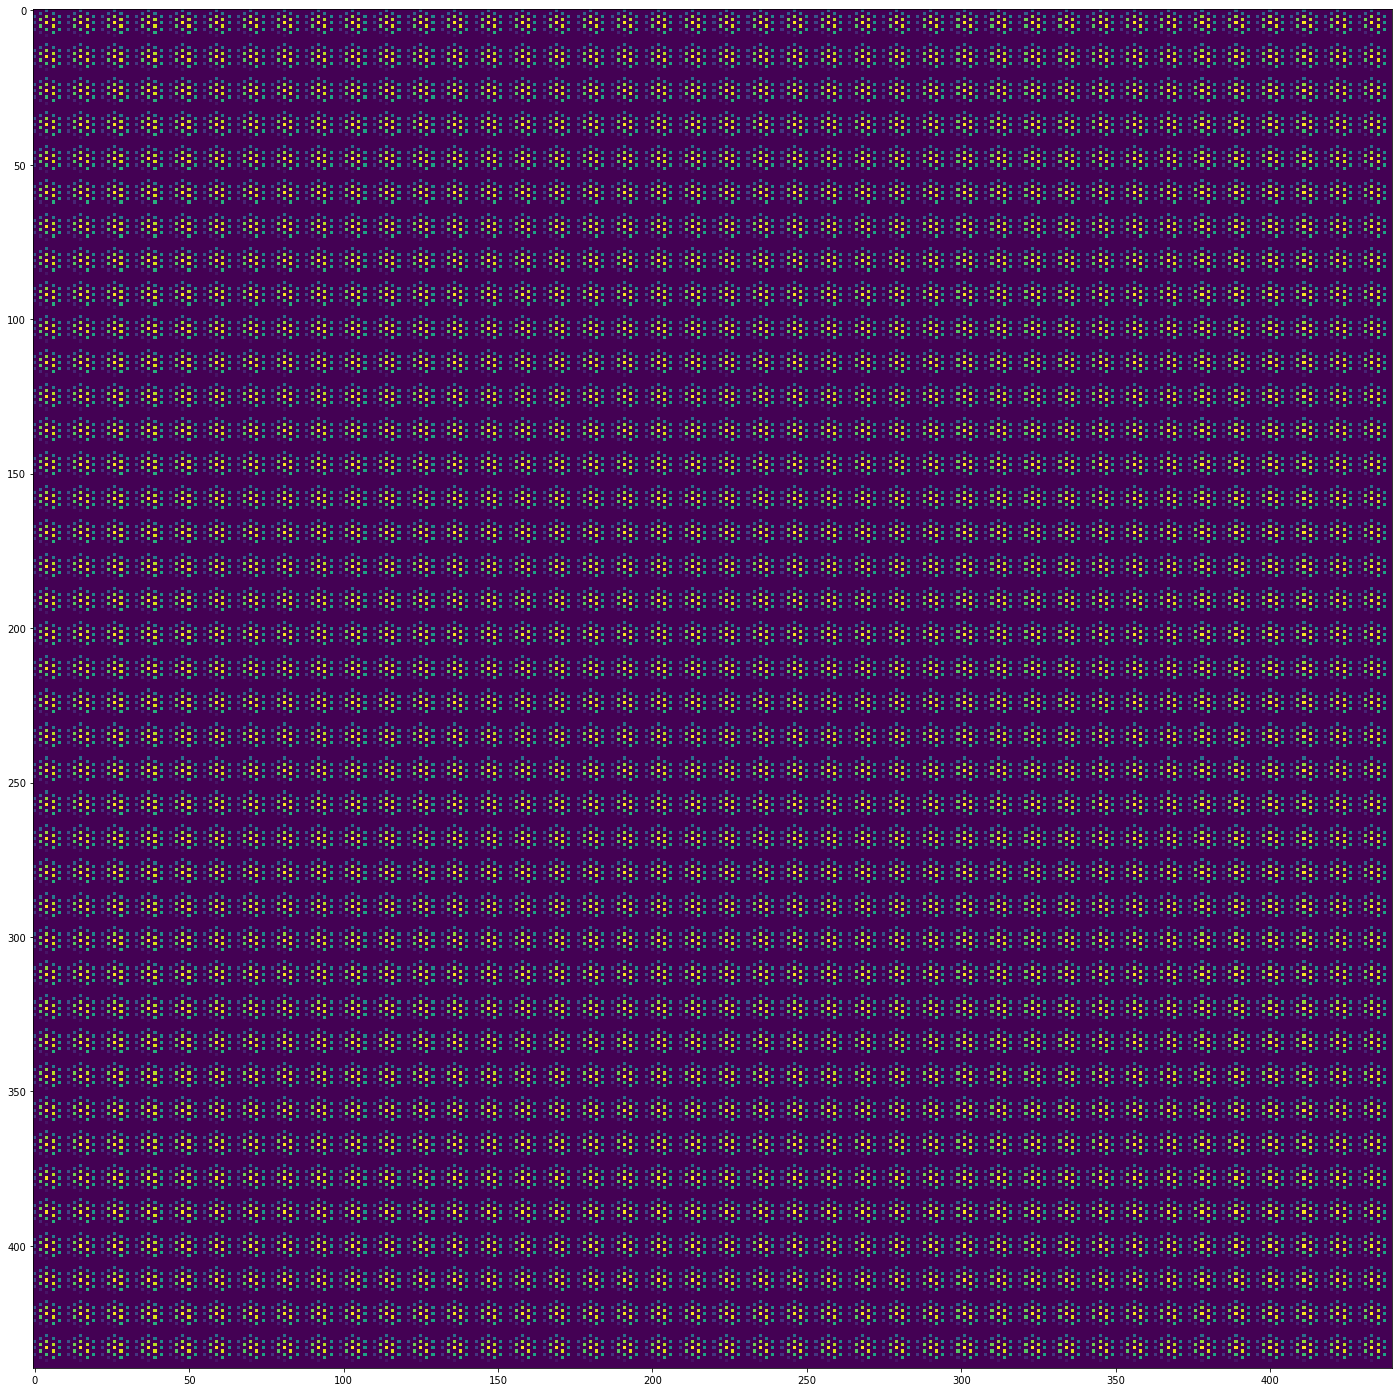

In [8]:
fig, ax = plt.subplots(1,1,figsize=(25,25),facecolor='w')
cmap = plt.cm.viridis
cmap.set_bad(color='black')
ev = np.zeros((40,40,19))
for i in range(19):
    ev[:,:,i]=i+1
# ev[:,:,5]=3+1
# ev[:,:,7]=3+1
a=get_plot_array(ev)
ax.imshow(a,
           origin="upper",
           cmap=cmap)
plt.show()

In [12]:
horizontal_map_array_idxs=[0,11,10,9,8,7,6,5,4,3,2,1,12,17,16,15,14,13,18]

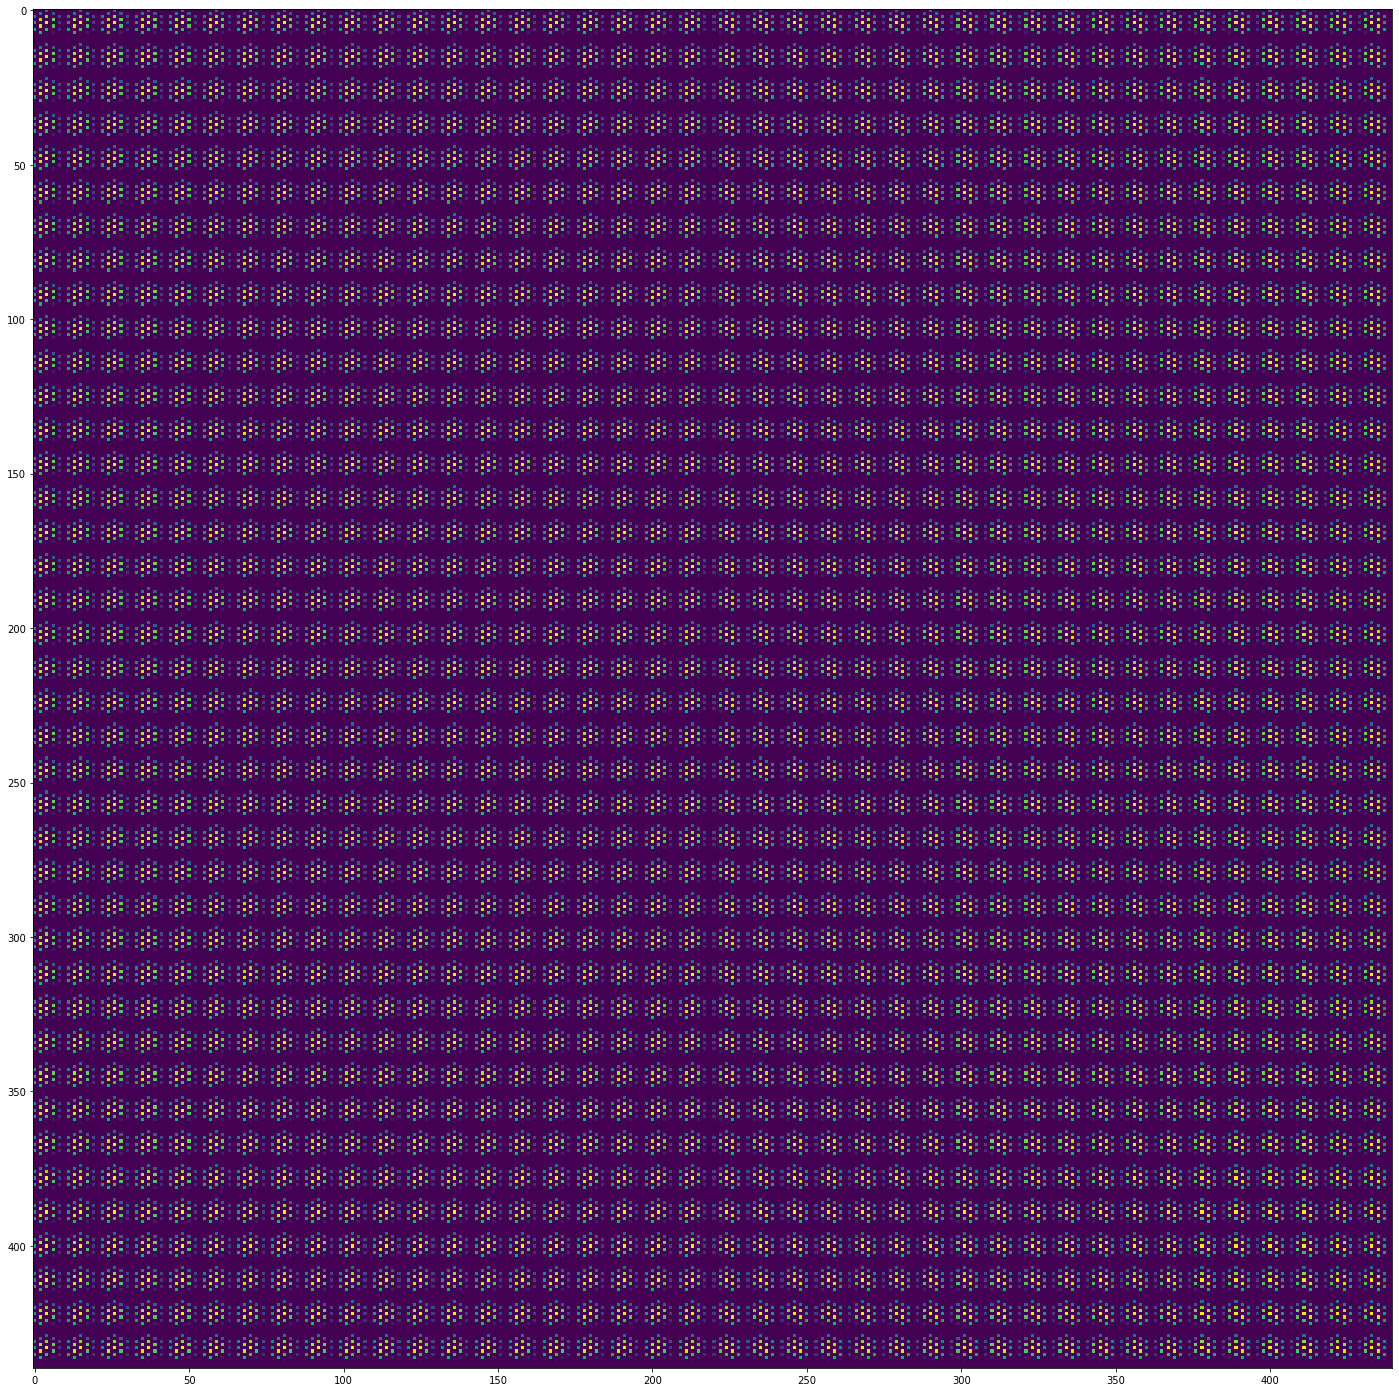

In [17]:
fig, ax = plt.subplots(1,1,figsize=(25,25),facecolor='w')
cmap = plt.cm.viridis
cmap.set_bad(color='black')
ev = np.zeros((40,40,19))
for i in range(19):
    ev[:,:,i]=4*i+1
ev[:,:20,:] = ev[:,:20,horizontal_map_array_idxs] 
a=get_plot_array(ev)
ax.imshow(a,
           origin="upper",
           cmap=cmap)
plt.show()

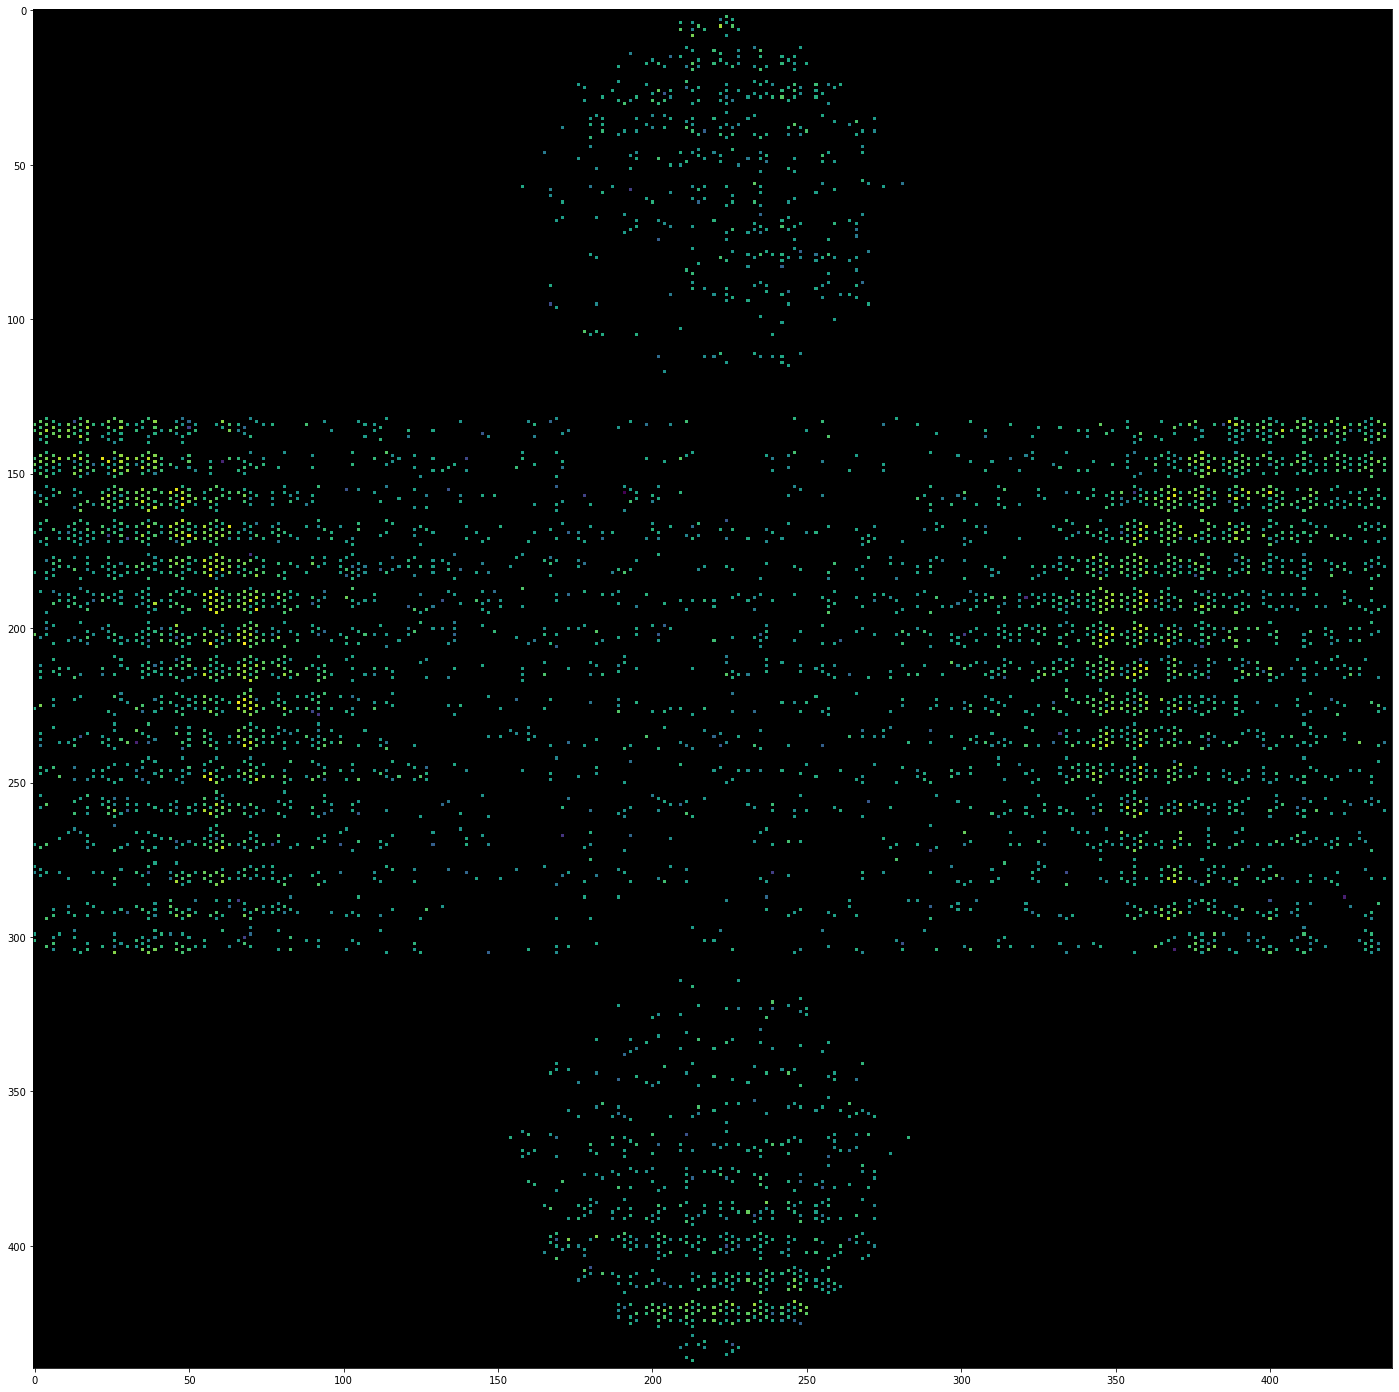

In [4]:
fig, ax = plt.subplots(1,1,figsize=(25,25),facecolor='w')
cmap = plt.cm.viridis
cmap.set_bad(color='black')
a=get_plot_array(original_eventdata[index,:,:,0:19])
ax.imshow(a,
           origin="upper",
           cmap=cmap,
           norm=colors.LogNorm(vmax=np.amax(a),
                                         clip=True))
plt.show()

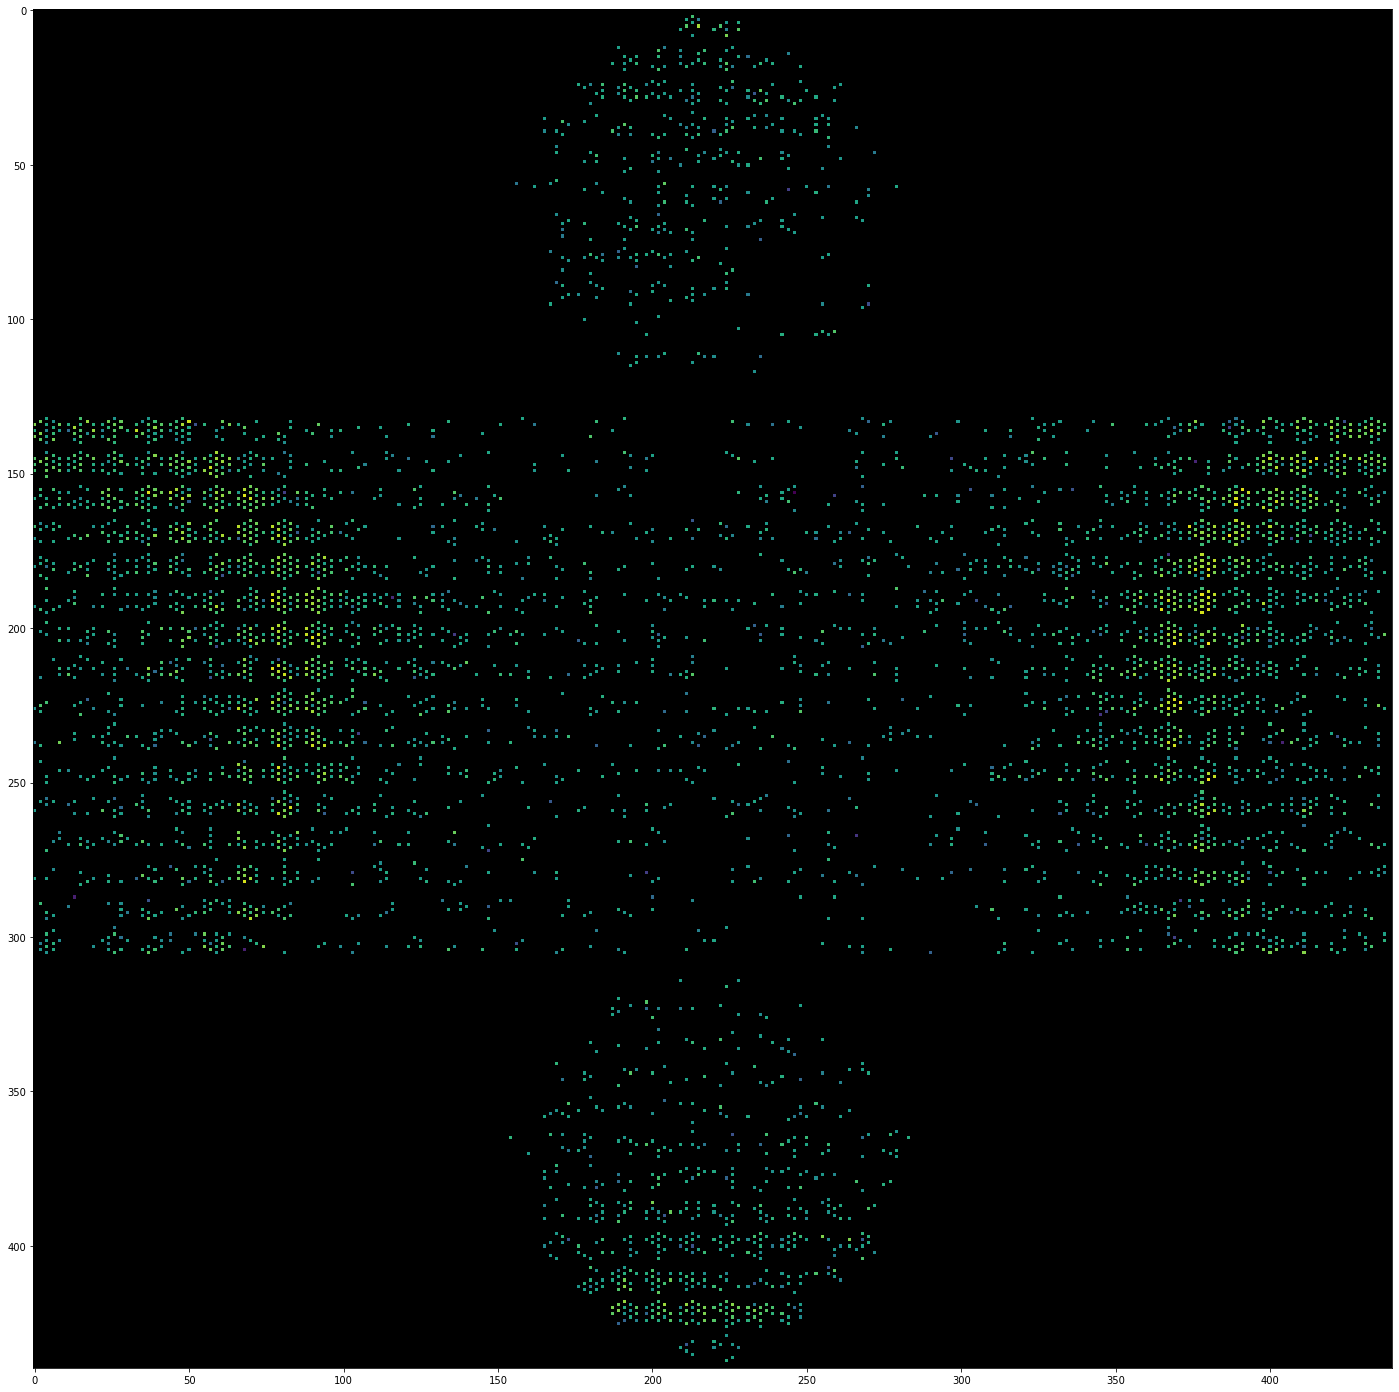

In [26]:
fig, ax = plt.subplots(1,1,figsize=(25,25),facecolor='w')
cmap = plt.cm.viridis
cmap.set_bad(color='black')
event=original_eventdata[index,:,:,:19]
event=np.flip(event[:,:,horizontal_map_array_idxs],axis=1)
a=get_plot_array(event)
ax.imshow(a,
           origin="upper",
           cmap=cmap,
           norm=colors.LogNorm(vmax=np.amax(a),
                                         clip=True))
plt.show()

# Vertical Flipping

In [28]:
vertical_map_array_idxs=[6,5,4,3,2,1,0,11,10,9,8,7,15,14,13,12,17,16,18]

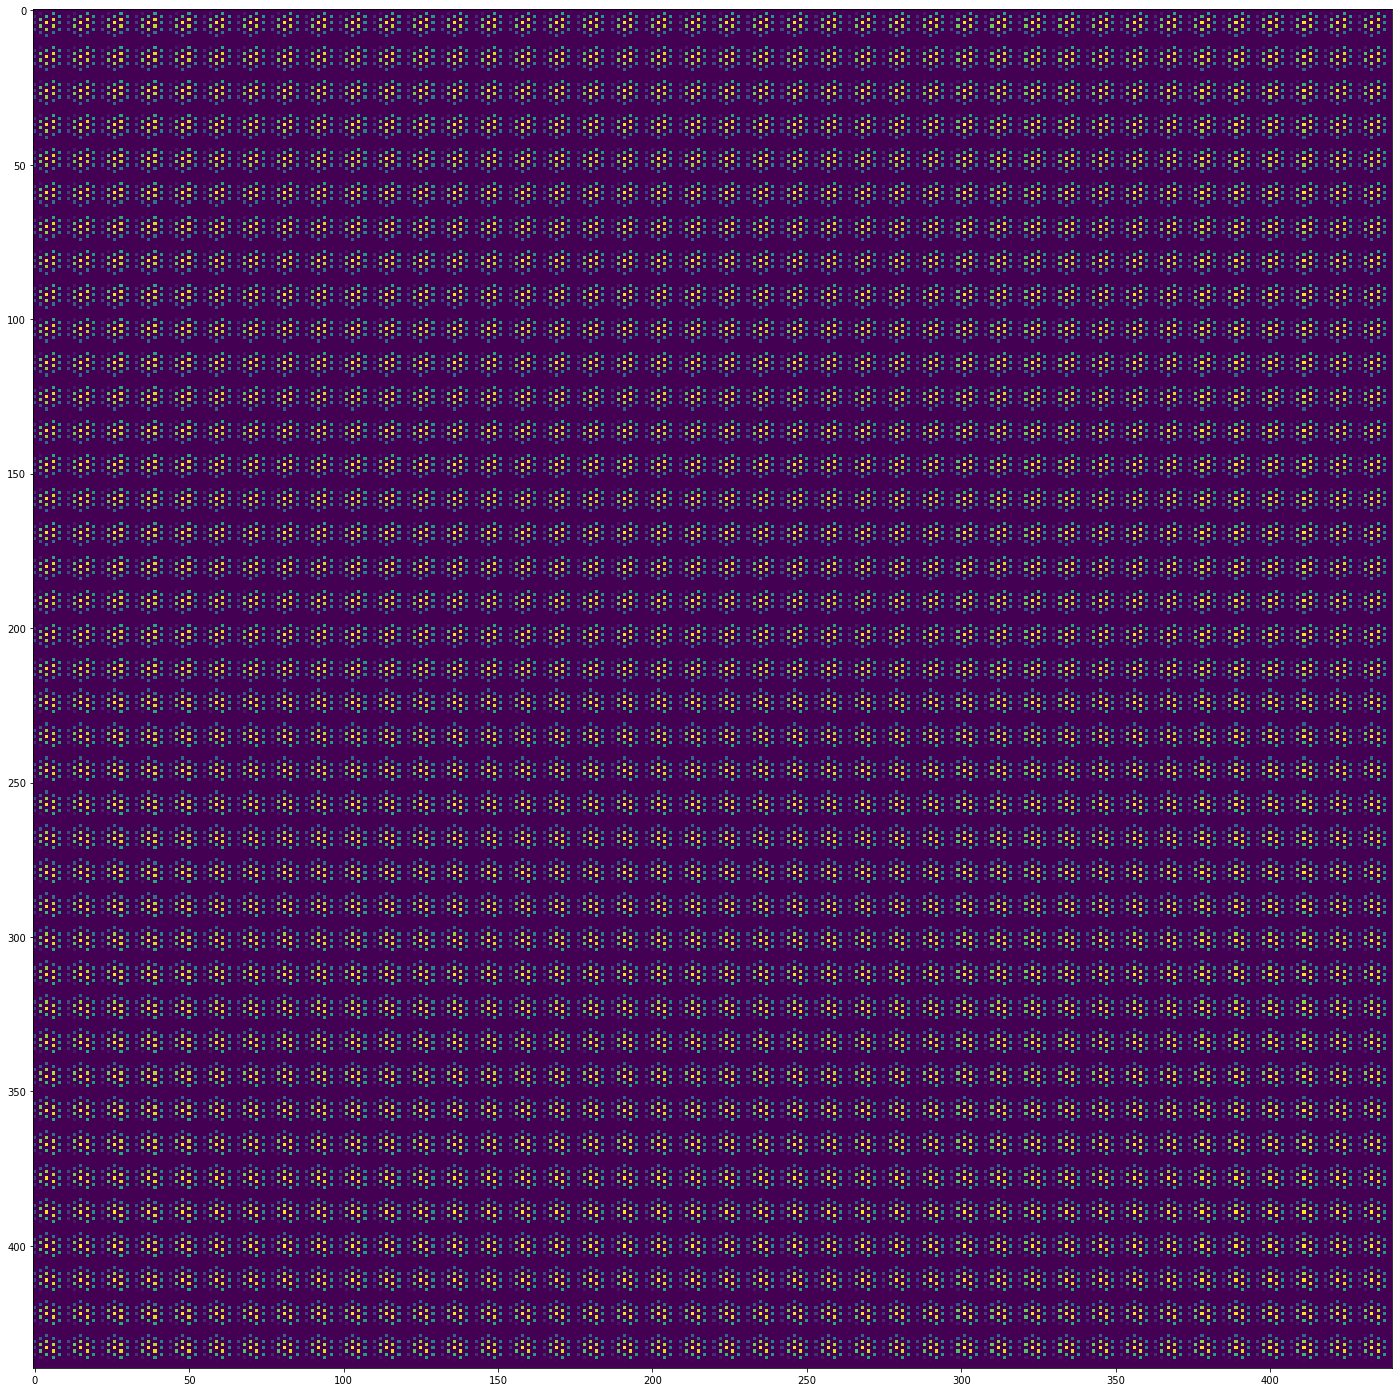

In [30]:
fig, ax = plt.subplots(1,1,figsize=(25,25),facecolor='w')
cmap = plt.cm.viridis
cmap.set_bad(color='black')
ev = np.zeros((40,40,19))
for i in range(19):
    ev[:,:,i]=4*i+1
ev[:20,:,:] = ev[:20,:,vertical_map_array_idxs] 
a=get_plot_array(ev)
ax.imshow(a,
           origin="upper",
           cmap=cmap)
plt.show()

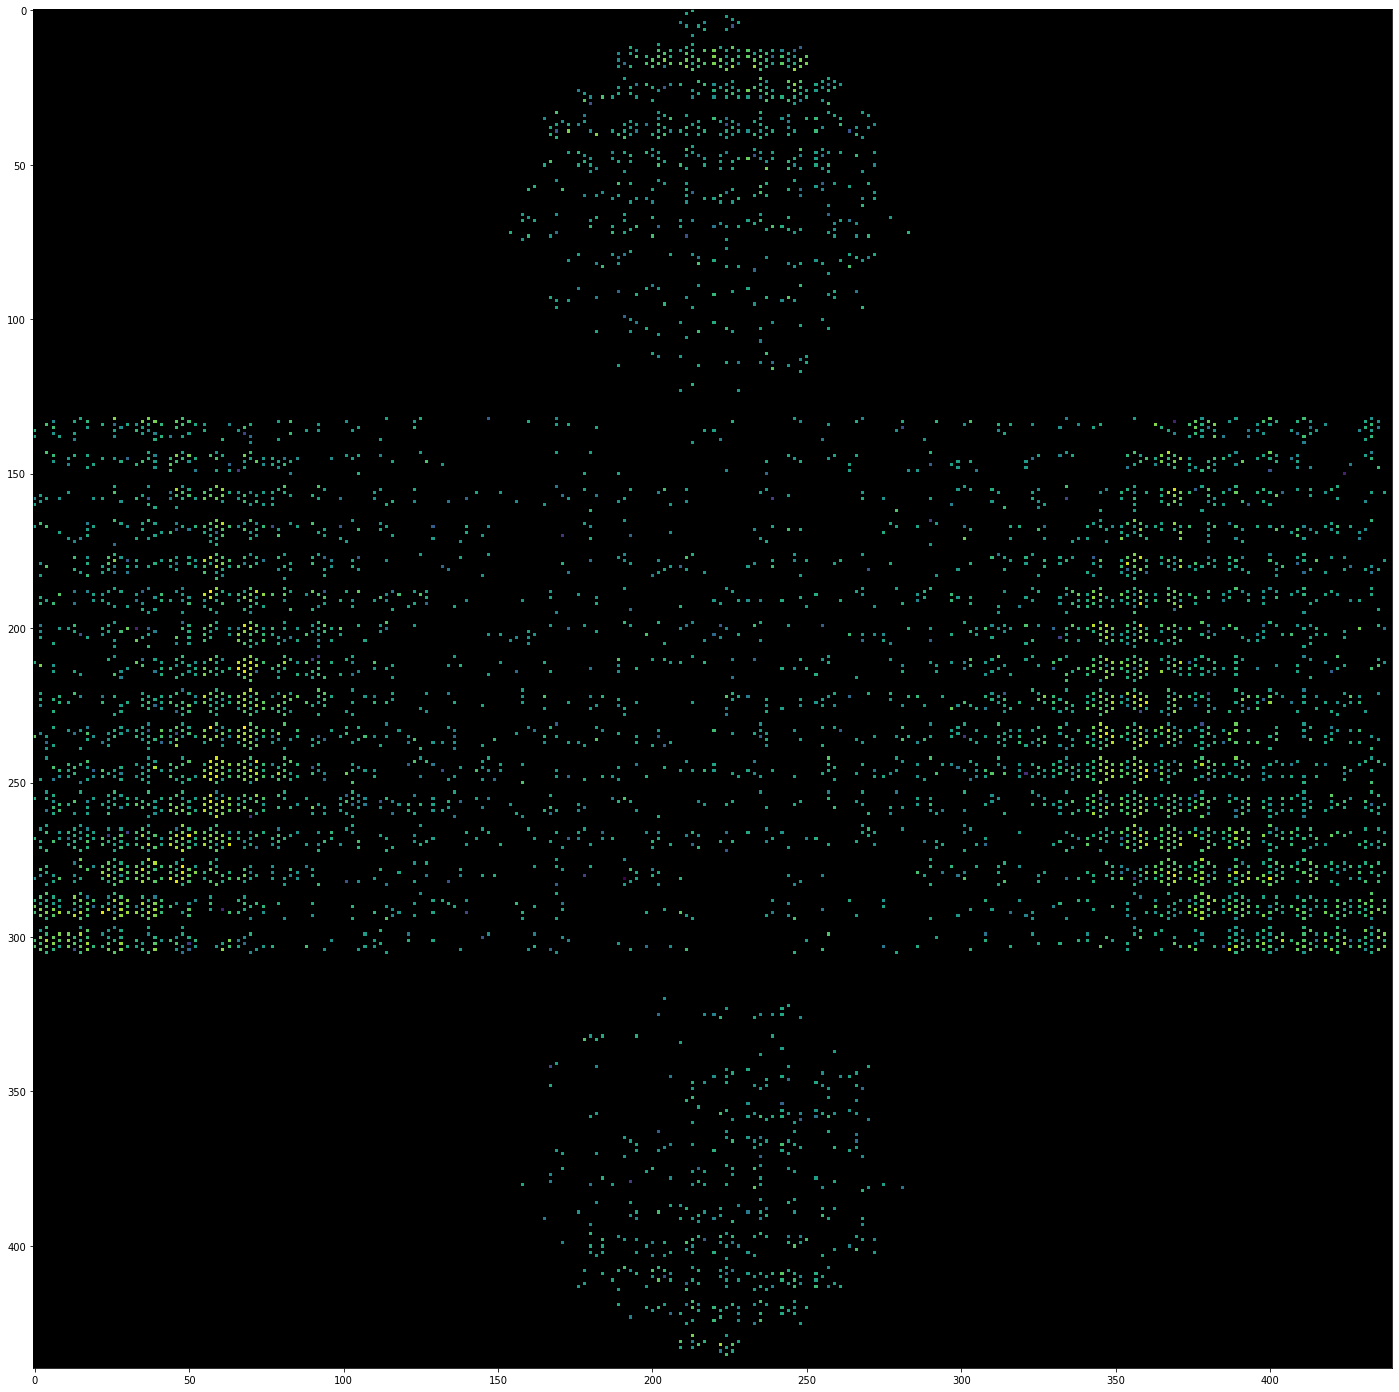

In [32]:
fig, ax = plt.subplots(1,1,figsize=(25,25),facecolor='w')
cmap = plt.cm.viridis
cmap.set_bad(color='black')
event=original_eventdata[index,:,:,:19]
event=np.flip(event[:,:,vertical_map_array_idxs],axis=0)
a=get_plot_array(event)
ax.imshow(a,
           origin="upper",
           cmap=cmap,
           norm=colors.LogNorm(vmax=np.amax(a),
                                         clip=True))
plt.show()